In [5]:
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
import cvxpy as cp

## Exercise 1

1.  $ x, y > 0; \quad x/y < 1 \quad \rightarrow \quad x < y \quad \rightarrow \quad \textbf{ Convex}$
2.  $ x, y > 0; \quad x/y > 1 \quad \rightarrow \quad x > y \quad \rightarrow \quad \textbf{ Convex}$
3.  $ x, y > 0; \quad xy < 1 \quad \rightarrow \quad \frac{1}{x} > y \quad \rightarrow \quad \textbf{ Not Convex} $
4.  $ x, y > 0; \quad xy > 1 \quad \rightarrow \quad \frac{1}{x} > y \quad \rightarrow \quad \textbf{ Convex} $

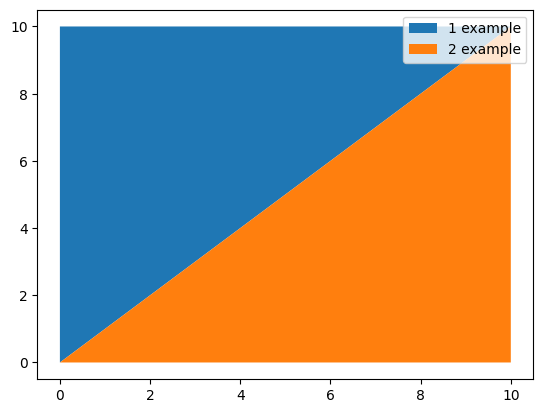

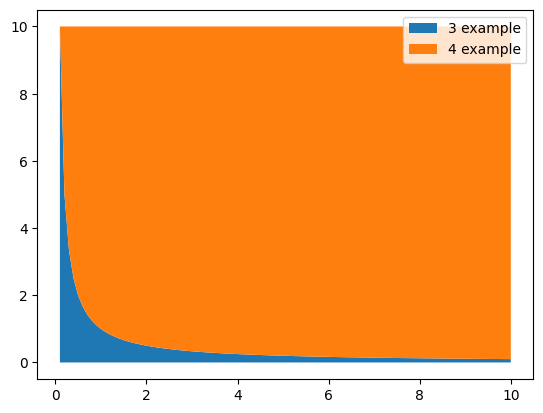

In [3]:
x = np.arange(0, 10, 10**-3)
plt.fill_between(x, x, 10, label='1 example')
plt.fill_between(x, x, 0, label='2 example')
plt.legend()
plt.show()

x = np.linspace(10**-1, 10, 100)
plt.fill_between(x, 0, 1/x, label='3 example')
plt.fill_between(x, 10, 1/x, label='4 example')
plt.legend()
plt.show()

## Exercise 2
##### a. $f(x, y) = \frac{x^2}{y}; \quad y > 0:$

$$
\nabla^2 f(x,y) =
\begin{Vmatrix}
\frac{2}{y} & -\frac{2x}{y^2} \\
-\frac{2x}{y^2} & \frac{2x^2}{y^3}
\end{Vmatrix}
$$

$$
\Delta_1 = 2/y > 0; \quad \quad \Delta_2 = 0; \quad \quad \Delta_3 = 2x^2 / y^3 > 0 \quad \rightarrow \quad \textbf{ Convex}
$$

##### b.  $f(x) = (\prod^n_{k=1} x_k)^{\frac{1}{n}}:$

$$
\frac{\partial{f}}{\partial{x_j}} = \frac{1}{n} \left(\prod_{k \neq j} x_k \right) \left(\prod_{k} x_k \right)^{-\frac{n-1}{n}};
$$

$$
\frac{\partial^2 f}{\partial x_k \partial x_j}=\left(\prod_{i=1}^n x_i\right)^{\frac{1}{n}}\left[\frac{1}{n^2} \frac{1}{x_j x_k}-\frac{1}{n} \frac{1}{x_j^2} \delta_{j k}\right]
$$
*Let's have a look at the quadratic form: (using Cauchy-Schwarz inequality to the vector $a_i=\left(\frac{v_i}{x_i}\right)$ and $b=\mathbf{1}$)*
$$
\sum_{j, k=1}^n v_j v_k \frac{\partial^2 f}{\partial x_k \partial x_j}=\frac{1}{n^2}\left(\prod_{i=1}^n x_i\right)^{\frac{1}{n}}\left[\sum_{j=1}^n \frac{v_j}{x_j} \sum_{k=1}^n \frac{v_k}{x_k}-n \sum_{j=1}^n \frac{v_j^2}{x_j^2}\right] \leq 0,
$$

$$
\left(\sum_{j=1}^n \frac{v_j}{x_j}\right)^2=\left(\sum_{j=1}^n \frac{v_j}{x_j} 1\right)^2=\langle a, b\rangle^2 \leq\|a\|^2\|b\|^2=\sum_{j=1}^n \frac{v_j^2}{x_j^2} \sum_{j=1}^n 1^2=n \sum_{j=1}^n \frac{v_j^2}{x_j^2} \quad \rightarrow \quad \textbf{ Convex}
$$

##### c. $f(x) = \ln \sum^n_{k=1} e^{x_k}:$

$$
v = (e^{x_1}, e^{x_2} \cdots e^{x_n})^T; \quad \rightarrow \quad \nabla^2 f(x) = \frac{1}{\mathbf{\hat{1}^T} v} diag(v) - \frac{1}{(\mathbf{\hat{1}^T} v)^2} v v^T
$$

$\text{As } \hat{v}^T\nabla f(x) \hat{v} > 0 \text{ for every } \hat{v}, \nabla^2 f(x) > 0.$ Let's check it:

$$
\hat{v}^T\nabla f(x) \hat{v} = \frac{\sum_k v_k \hat{v}^2_k  \left(\sum_k v_k\right) - \left(\sum_k v_k \hat{v}_k \right)^2 }{\left(\sum_k v_k \right)^2} > 0 \quad \rightarrow \quad \textbf{ Convex}
$$

##### d*. $f(x, t) = \ln (t^2 - x x^T) $; { $(x,t) \in R^n \times R|t > ||x||_2 $ }:

 $$f =  -ln(t^2 - ||x||_2^2); \frac{\partial f}{\partial t} = \frac{-2t}{t^2 - ||x||_2^2}; \frac{\partial f}{\partial x_i} = \frac{2x_i}{t^2 - ||x||_2^2}$$

$$ \frac{\partial^2 f}{\partial t^2} = \frac{-2}{t^2 - ||x||_2^2} + \frac{4t^2}{(t^2 - ||x||_2^2)^2}; \quad \frac{\partial^2 f}{\partial x_i \partial t} =  \frac{-4tx_i}{(t^2 - ||x||_2^2)^2}$$;
$$ \frac{\partial^2 f}{\partial x_i^2} = \frac{2}{t^2 - ||x||_2^2} + \frac{4x_i^2}{(t^2 - ||x||_2^2)^2};
\quad \frac{\partial^2 f}{\partial x_i \partial x_j} = \frac{4x_i x_j}{(t^2 - ||x||_2^2)^2}$$
$$ \Delta = (t^2 - ||x||_2^2) > 0; \quad H_{ij} = \frac{1}{\Delta^2} * (M_{ij})$$
$$ v^TM_{ij} v = 2Δ (\sum_i{v_i^2 - t^2}) + 4(\sum_i{v_ix_i})^2 - 4(\sum_i{v_it})(\sum_i{v_ix_i}) \geq 0 $$

## Exercise 3

- ##### a. $F(x) = ||Ax-b|| \cdot \frac{1}{1-x^T x} = f \cdot g $

 $$ \nabla f=2 A^T(Ax - b); \quad \nabla^2 f = 2 A^T A \text{ - positive definite} $$

$$ \nabla g=\frac{2 x}{\left(1-x^T x\right)^2}; \quad \frac{\partial^2 g}{\partial x_i \partial x_j}=\frac{8 x_i x_j}{\left(1-x^T x\right)^3}; \frac{\partial^2 g}{\partial x_i^2}=\frac{2}{\left(1-x^T x\right)^2}+\frac{8 x_i^2}{\left(1-x^T x\right)^3}
$$

$$
\begin{aligned}
&(fg)^{\prime \prime}=f^{\prime \prime} g+2(\nabla f)^T \nabla g+f g^{\prime \prime} \\
& 2(\nabla f)^T \nabla g=\frac{8(A x-b)^T(A x)}{\left(1-x^T x\right)^2} > 0 \\
\end{aligned}
$$

- ##### b.
##### $||x|| \leq 1$:
$$
f_1(x) = \frac{1}{2} ||x||^2_2 = \frac{1}{2} \sum_i x_i^2; \quad \nabla f_1 = x; \quad \nabla^2 f_1 = I \text{ - Identity matrix (positive definite)}
$$
##### $||x|| > 1$:
$$
f_2(x) = ||x||_2 - 1/2; \quad \nabla f_2 = \frac{x}{||x||_2}; \quad \nabla^2 f_2 = \frac{I}{||x||^2_2} - \frac{x x^T}{||x||_2^3} \text{ - positive definite}
$$

##### Continuity (we should check f when $||x|| = 1$):
$$
f_1[||x|| = 1] = 1/2 = f_2[||x|| = 1]
$$
$$
\nabla f_1[||x|| = 1] = x = \nabla f_2[||x|| = 1]
$$

$$\text{f(x) is continuous} \quad \rightarrow \textbf{Convex}$$

## Exercise 4

- ##### a.
*As partial derivatives at every point are 1, -1 or 0, then hessian of "spread" is zero* $\nabla^2 f = 0 \quad \rightarrow \textbf{Convex}$

- ##### b.
$$
\begin{aligned}
f(x) & =\left(\frac{1}{n} x^T x-\left(\frac{1}{n} x^T \hat{1}\right)^2\right)^{1 / 2} \\
& =\left(\frac{1}{n}\left(x-\frac{1}{n} \hat{1}^T x \hat{1}\right)^T\left(x-\frac{1}{n} \hat{1}^T x \hat{1}\right)\right)^{1 / 2} \\
& =\frac{1}{\sqrt{n}}\left\|\left(I-\frac{1}{n} \hat{1} \hat{1}^T\right) x\right\|_2 \\
& =\frac{1}{\sqrt{n}}\|(I-P) x\|_2
\end{aligned}
$$

So $f$ is a composition of a linear map with the $\ell_2$ norm, so it's convex by the triangle inequality.

## Exercise 5

In [4]:
data = np.load('../data/data_7.5.npz')
x = data['x']
y = data['y']

Matrix = np.array([x**2, x, np.ones(len(x))]).T

In [5]:
np_coef = np.linalg.lstsq(Matrix, y, rcond=None)[0]
print(np_coef)


cvx_coef = cp.Variable(3)
loss = cp.sum((Matrix @ cvx_coef - y)**2)
problem = cp.Minimize(loss)
cp.Problem(problem, None).solve()
print(cvx_coef.value)

[1.11782318 0.92097453 7.21154154]
[1.11782318 0.92097453 7.21154154]


In [6]:
loss2 = cp.sum(cp.abs(Matrix @ cvx_coef - y))
problem = cp.Minimize(loss2)
cp.Problem(problem, None).solve()
c = cvx_coef.value
print(c)

[0.99559652 2.11117664 1.95468203]


 *Least square problem is more sensitive to large deviations in data. We have some spikes which have the biggest impact on variance. Therefore second approach with summation of the absolute values is better when we have large spikes in data, and fit with such model becomes more appealing*

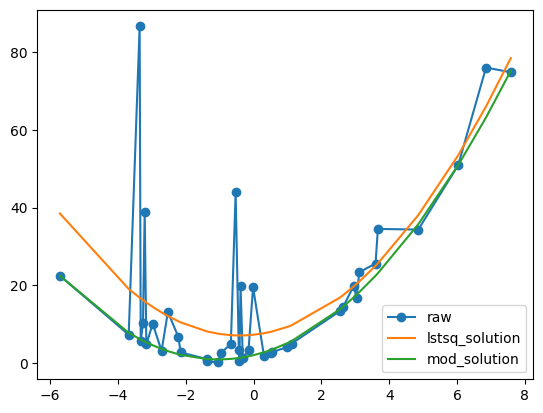

In [7]:
lstsq = np_coef[0] * x**2 + np_coef[1] * x + np_coef[2]
mod = c[0] * x**2 + c[1] * x + c[2]
plt.plot(x, y, 'o-', label='raw')
plt.plot(x, lstsq, label='lstsq_solution')
plt.plot(x, mod, label='mod_solution')
plt.legend()

## Exercise 6

In [17]:
data = np.load('../data/data_7.6.npz')
y = data['y']
X = data['X']
X.shape

(10, 20)

##### Initial problem can be reformulated as a liner programming problem of the following form:

$$ \min_{a} \hat{1}^T \cdot a;  \quad X \cdot a = y \quad \text{(without inequalities and lower and upper boundaries)} $$

In [21]:
from scipy.optimize import linprog as lpg

res = lpg(c=np.ones(20), A_eq=X, b_eq=y, bounds=None)
print(res.success)
print(res.x)

True
[0.         0.         1.7920228  2.37085535 1.90844184 0.41375536
 2.29376388 2.87387172 3.15729643 0.         1.75876098 0.
 2.09667607 0.         0.         0.         0.         0.
 0.02250033 0.        ]


## Exercise 7

In [15]:
data = np.load('../data/data_7.7.npz')
X = data['X']
y = data['y']

(200, 100)

100%|██████████| 200/200 [00:08<00:00, 22.78it/s]


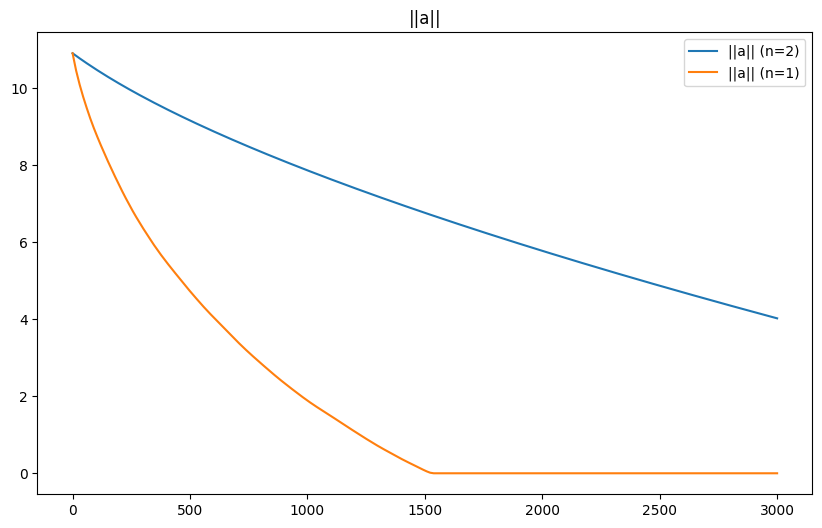

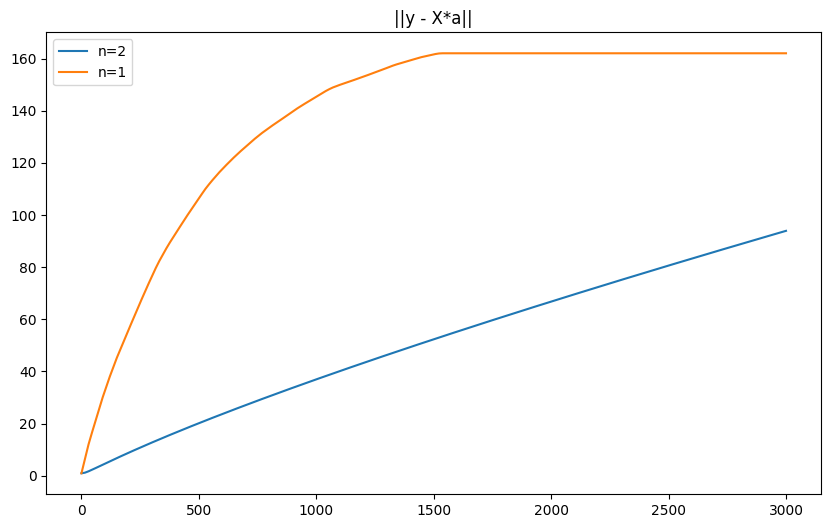

In [9]:
def solver(p, n):
    a = cp.Variable(M)
    loss = cp.sum((X @ a - y)**2) + p*cp.norm(a, n)
    problem = cp.Minimize(loss)
    return cp.Problem(problem, None).solve(), a.value

params = np.linspace(0, 3000, 200)
residuals_2 = np.zeros(params.shape)
anorm_2 = np.zeros(params.shape)
for i in tqdm(range(len(params))):
    _, a2 = solver(params[i], 2)
    residuals_2[i] = np.linalg.norm(y - X @ a2)
    anorm_2[i] = np.linalg.norm(a2)

residuals_1 = np.zeros(params.shape)
anorm_1 = np.zeros(params.shape)
for i in tqdm(range(len(params))):
    _, a1 = solver(params[i], 1)
    residuals_1[i] = np.linalg.norm(y - X @ a1)
    anorm_1[i] = np.linalg.norm(a1)

plt.figure(figsize=(10,6))
plt.plot(params, anorm_2, label='||a|| (n=2)')
plt.plot(params, anorm_1, label='||a|| (n=1)')
plt.legend()
plt.title('||a||')
plt.show()

plt.figure(figsize=(10,6))
plt.plot(params, residuals_2, label='n=2')
plt.plot(params, residuals_1, label='n=1')
plt.title('||y - X*a||')
plt.legend()
plt.show()